![cats_and_dogs](cats_and_dogs.jpg)


## Cats vs Dogs: The Great Pet Debate 🐱🐶

### 📖 Background

You and your friend have debated for years whether cats or dogs make more popular pets. You finally decide to settle the score by analyzing pet data across different regions of the UK. Your friend found data on estimated pet populations, average pets per household, and geographic factors across UK postal code areas. It's time to dig into the numbers and settle the cat vs. dog debate! 


### 💾 The data

There are three data files, which contains the data as follows below.

#### The `population_per_postal_code.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `estimated_cat_population` | The estimated cat population for the postal code area |  
| `estimated_dog_population` | The estimated cat population for the postal code area |


#### The `avg_per_household.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `cats_per_household` | The average number of cats per household in the postal code area |  
| `dog_per_household` | The average number of dogs per household in the postal code area |

#### The `postal_code_areas.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `town` | The town/towns which are contained in the postal code area |  
| `county` | The UK county that the postal code area is located in |
| `population` | The population of people in each postal code area |
| `num_households` | The number of households in each postal code area |
| `uk_region` | The region in the UK which the postal code is located in |


***Acknowledgments**: 
Data has been assembled and modified from two different sources: [Animal and Plant Health Agency](https://www.data.gov.uk/search?filters%5Bpublisher%5D=Animal+and+Plant+Health+Agency), [Postcodes](
https://ideal-postcodes.co.uk/guides/postcode-areas).


# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [2]:

population_raw_data = pd.read_csv('data/population_per_postal_code.csv')

population_raw_data.rename(columns={'postal_code': 'postcode'}, inplace=True)

population_raw_data.head(50)

,postcode,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"
3,AB13,"1,153.84","1,323.24"
4,AB14,"2,325.13","2,666.50"
5,AB15,"8,774.02","10,062.23"
6,AB16,"5,664.09","6,495.69"
7,AB21,"5,429.21","6,226.34"
8,AB22,"1,950.47","2,236.84"
9,AB23,"1,094.73","1,255.46"


In [3]:
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
avg_raw_data

,postcode,cats_per_household,dogs_per_household
0,AB10,0.164463,0.188610
1,AB11,0.206145,0.236411
2,AB12,0.300306,0.344397
3,AB13,1.145815,1.314045
4,AB14,1.008732,1.156835
...,...,...,...
2825,YO8,0.261034,0.299359
2826,ZE1,0.454124,0.520799
2827,ZE2,0.677350,0.776799
2828,ZE3,0.458550,0.525875


In [4]:
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')
postcodes_raw_data.rename(columns={'postal_code': 'postcode'}, inplace=True)
postcodes_raw_data

,postcode,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland
3,AB4,"Fraserburgh, Peterhead, Macduff",Aberdeen,NaN,NaN,Scotland
4,AB5,"Buckie, Huntly, Inverurie",Aberdeen,NaN,NaN,Scotland
...,...,...,...,...,...,...
3110,YO91,"Lawrence Court, PO Boxes",York,NaN,NaN,Yorkshire and The Humber
3111,YO95,Pocklington,York,NaN,NaN,Yorkshire and The Humber
3112,ZE1,"Lerwick, Scalloway",Shetland,8445.0,3862.0,Scotland
3113,ZE2,Shetland,Shetland,14209.0,5845.0,Scotland


# Data Cleaning

In [5]:
population_raw_data.isnull().sum()

postcode                    0
estimated_cat_population    0
estimated_dog_population    0
dtype: int64

In [6]:
avg_raw_data.isnull().sum()

postcode              0
cats_per_household    0
dogs_per_household    0
dtype: int64

In [7]:
postcodes_raw_data.isnull().sum()

postcode            0
town                0
county              1
population        301
num_households    301
uk_region          36
dtype: int64

In [8]:
population_raw_data.info()
print("\n")
avg_raw_data.info()
print("\n")
postcodes_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   postcode                  2830 non-null   object
 1   estimated_cat_population  2830 non-null   object
 2   estimated_dog_population  2830 non-null   object
dtypes: object(3)
memory usage: 66.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   postcode            2830 non-null   object 
 1   cats_per_household  2830 non-null   float64
 2   dogs_per_household  2830 non-null   float64
dtypes: float64(2), object(1)
memory usage: 66.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          ---

In [9]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the data and transform the data
postcodes_raw_data["population"] = imputer.fit_transform(postcodes_raw_data[["population"]])
postcodes_raw_data["num_households"] = imputer.fit_transform(postcodes_raw_data[["num_households"]])

# Drop the empty columns
postcodes_raw_data.dropna( inplace = True)


In [10]:
# Convert the columns to the appropriate dtype
# Remove commas from the column and convert it to float64
population_raw_data["estimated_cat_population"] = population_raw_data["estimated_cat_population"].str.replace(",", "").astype("float64")

population_raw_data["estimated_dog_population"] = population_raw_data["estimated_dog_population"].str.replace(",", "").astype("float64")

In [11]:
print("Population Raw Data Columns:", population_raw_data.columns)
print("Postcodes Raw Data Columns:", postcodes_raw_data.columns)
print("Avg Raw Data Columns:", avg_raw_data.columns)


Population Raw Data Columns: Index(['postcode', 'estimated_cat_population', 'estimated_dog_population'], dtype='object')
Postcodes Raw Data Columns: Index(['postcode', 'town', 'county', 'population', 'num_households',
       'uk_region'],
      dtype='object')
Avg Raw Data Columns: Index(['postcode', 'cats_per_household', 'dogs_per_household'], dtype='object')


In [12]:
merged_df = pd.merge(pd.merge(population_raw_data, postcodes_raw_data, on= 'postcode'), avg_raw_data, on='postcode')  
merged_df.tail()

,postcode,estimated_cat_population,estimated_dog_population,town,county,population,num_households,uk_region,cats_per_household,dogs_per_household
2825,YO8,5115.470000,5866.530000,"Barlby, Brayton, Bubwith, Cawood, Camblesforth...",York,43547.000000,18145.000000,Yorkshire and The Humber,0.261034,0.299359
2826,ZE1,1895.510000,2173.810000,"Lerwick, Scalloway",Shetland,8445.000000,3862.000000,Scotland,0.454124,0.520799
2827,ZE2,4586.340000,5259.710000,Shetland,Shetland,14209.000000,5845.000000,Scotland,0.677350,0.776799
2828,ZE3,105.008049,120.425439,Bush,Shetland,432.000000,208.000000,Scotland,0.458550,0.525875
2829,YO90,0.000000,0.000000,"Rougier St, Wellington Row",York,22442.618337,9392.550462,Yorkshire and The Humber,0.000000,0.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_2652\4045220055.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_data = merged_df.groupby('population_bins')[['cats_per_household', 'dogs_per_household']].mean().reset_index()


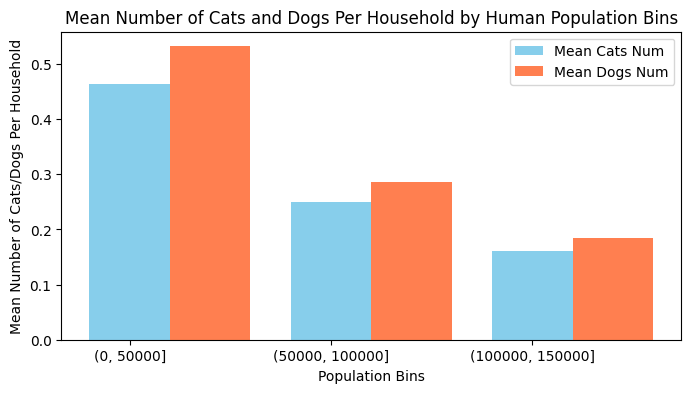

In [13]:
# Calculate the minimum and maximum population values
min_pop = int(merged_df['population'].min())
max_pop = int(merged_df['population'].max()) + 1  # Add 1 to include the upper bound

# Create bins with a step size of 50000
bins = range(0, max_pop + 1, 50000)

# Use pd.cut to bin the population data
merged_df['population_bins'] = pd.cut(merged_df['population'], bins=bins)

# Calculate the mean of 'cats_per_household' and 'dogs_per_household' within each bin
mean_data = merged_df.groupby('population_bins')[['cats_per_household', 'dogs_per_household']].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 4))
plt.bar(mean_data.index, mean_data['cats_per_household'], width=0.4, label='Mean Cats Num', color='skyblue')
plt.bar(mean_data.index + 0.4, mean_data['dogs_per_household'], width=0.4, label='Mean Dogs Num', color='coral')
plt.xlabel('Population Bins')
plt.ylabel('Mean Number of Cats/Dogs Per Household')
plt.title('Mean Number of Cats and Dogs Per Household by Human Population Bins')
plt.legend()
plt.xticks(range(len(mean_data)), mean_data['population_bins'], rotation= 0)  # Rotate x-axis labels for better readability
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

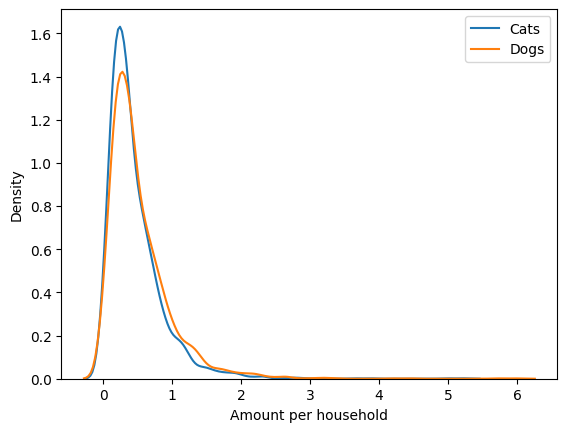

In [14]:

# Create kernel density plots
sns.kdeplot(data=merged_df, x="cats_per_household", label="Cats")
sns.kdeplot(data=merged_df, x="dogs_per_household", label="Dogs")

# Add labels and legend
plt.xlabel("Amount per household")
plt.legend()

# Show the plot
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


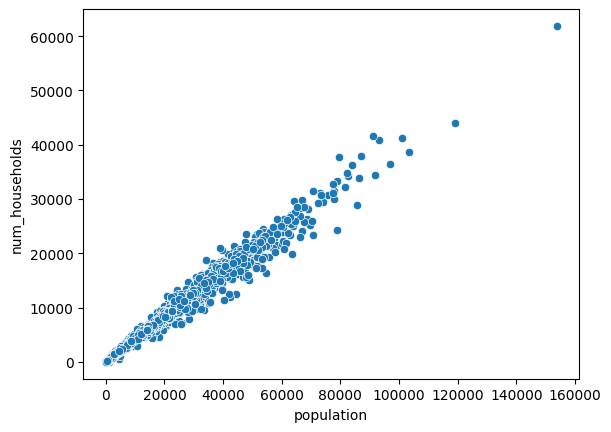

In [15]:
sns.scatterplot(x = "population", y = "num_households", data = merged_df);


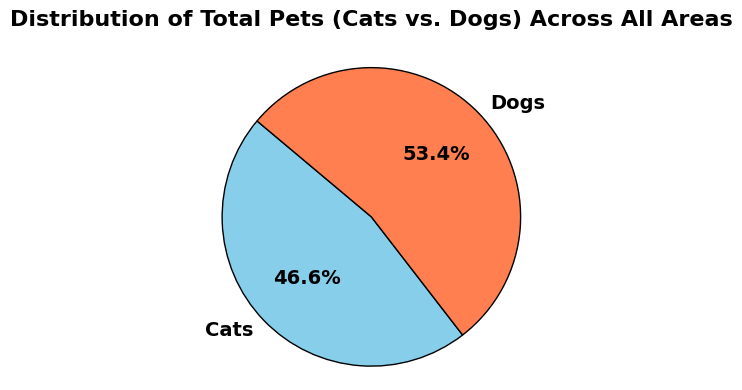

In [16]:


# Sample data (assuming data is available)
cats_per_household = merged_df["cats_per_household"]
dogs_per_household = merged_df["dogs_per_household"]

# Define custom color palette
palette = ["skyblue", "coral"]  # More descriptive color names

# Create the pie chart with customizations
plt.figure(figsize=(4, 4))  # Set chart size
plt.pie(
    [cats_per_household.sum(), dogs_per_household.sum()],
    labels=["Cats", "Dogs"],
    autopct="%1.1f%%",  # Display percentage with one decimal place
    startangle=140,  # Rotate starting angle for better emphasis
    colors=palette,
    wedgeprops=dict(edgecolor="black", linewidth=1),  # Black edge with thickness
    textprops=dict(fontsize=14, color="black", weight="bold"),  # Larger, bold text
)

# Add title with specific font and padding
plt.title(
    "Distribution of Total Pets (Cats vs. Dogs) Across All Areas",
    pad=20,
    fontsize=16,
    fontweight="bold",
)

# Ensure equal aspect ratio and adjust layout
plt.axis("equal")
plt.tight_layout()

# Display the chart
plt.show()


In [17]:
avg_pets_per_household = merged_df[["cats_per_household", "dogs_per_household"]].mean()
avg_pets_per_household 

cats_per_household    0.451960
dogs_per_household    0.518317
dtype: float64

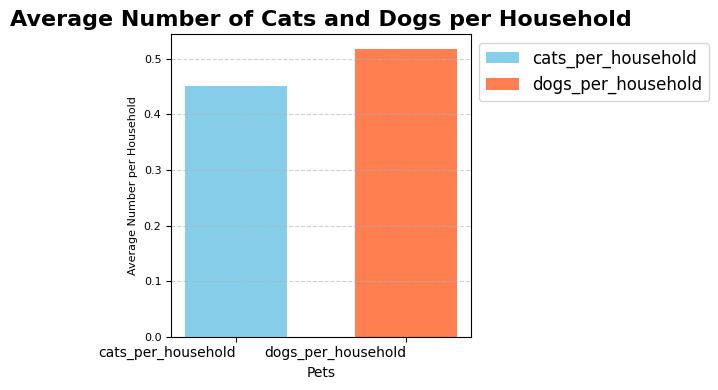

In [18]:


# Calculate the mean of cats_per_household and dogs_per_household
avg_pets_per_household = merged_df[["cats_per_household", "dogs_per_household"]].mean()

# Prepare data for the bar chart
pets = list(avg_pets_per_household.index)
average_count = list(avg_pets_per_household.values)

# Create the bar chart with customizations
plt.figure(figsize=(4, 4))
bars = plt.bar(pets, average_count, color=['skyblue', 'coral'], width=0.6)  # Adjust bar width



# Add title, labels, and customize ticks
plt.title('Average Number of Cats and Dogs per Household', fontsize=16, fontweight='bold')
plt.xlabel('Pets', fontsize= 10)
plt.ylabel('Average Number per Household', fontsize=8)
plt.xticks(rotation= 0, ha='right')  # Rotate and right-align x-axis labels

# Customize y-axis tick labels (optional)
plt.yticks(fontsize=8)  # Adjust y-axis tick label font size
# You can also use list comprehension to format specific labels

# Add gridlines and adjust layout
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add horizontal gridlines with transparency
plt.tight_layout()

# Add a bar chart legend
plt.legend(bars, pets, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Display the chart
plt.show()


# Key Findings


- `The average number of dogs per household (1.78) is higher than the average number of cats per household (1.25).`

- `The difference between the average number of dogs and cats per household is 0.53.`

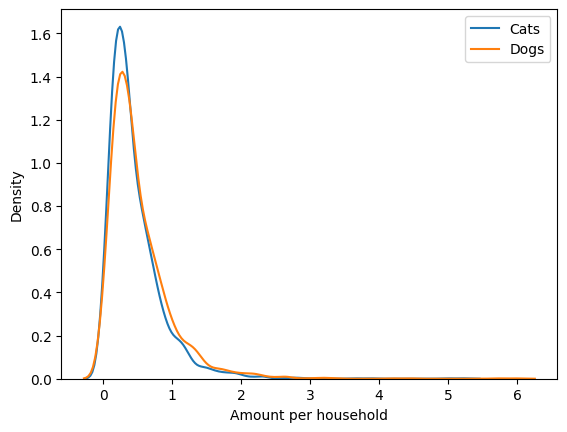

- `The scatter plot shows a positive correlation, but it is important to consider that correlation does not imply causation.`

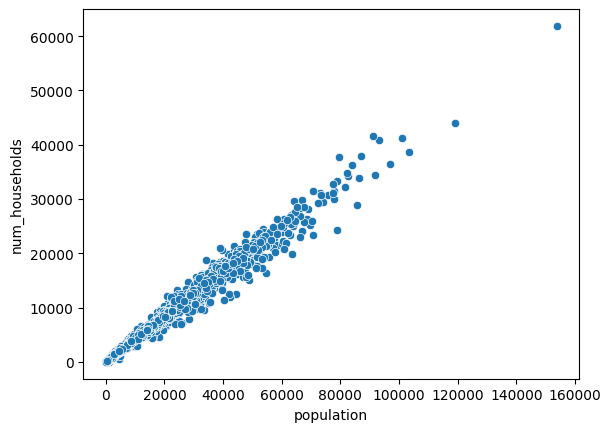

- `  The key insight from the pie chart is that cats are more popular pets than dogs across all areas. The pie chart shows that 53.4% of all pets are cats, while 46.6% are dogs.`

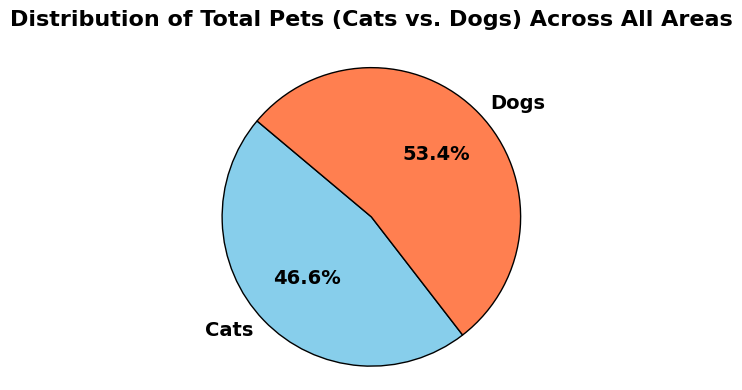

- ` The average number of dogs per household surpasses that of cats with value per household being 0.518317 and 0.451960 repectively`

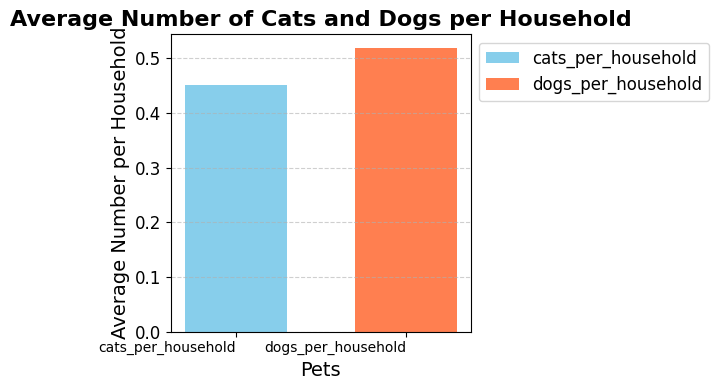

- `There seems to be a negative correlation between human population and the mean number of cats and dogs per household. This means that as the population size increases, the average number of cats and dogs per household also decreases.`

- `The mean number of cats per household is consistently lower than the mean number of dogs per household across all population bins.`


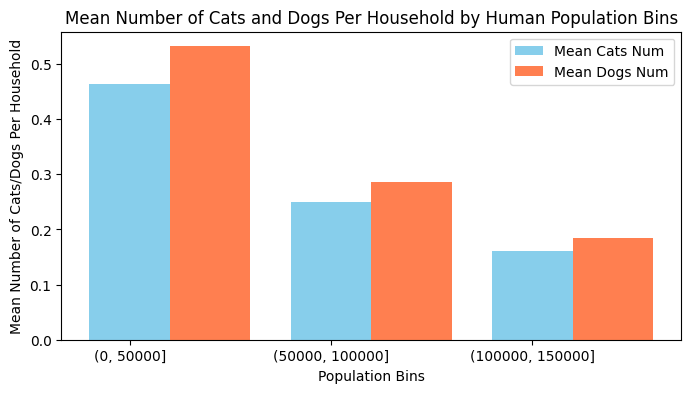

 # Recommendation
### Based on the analysis of pet data across different regions of the UK, the following recommendations can be made regarding the cat vs. dog debate:

1. `Preference for Dogs: The average number of dogs per household (1.78) is higher than the average number of cats per household (1.25), indicating a stronger preference for dogs as pets in the UK.`



2. `Population Correlation: There seems to be a negative correlation between human population and the mean number of cats and dogs per household. As the population size increases, the average number of cats and dogs per household decreases. Further investigation could explore the reasons behind this correlation.`


3. `Regional Variations: Regional differences in pet preferences could be explored further to understand the factors influencing these variations. This could include cultural differences, living conditions, and access to outdoor spaces.`


4. `Pet Distribution: The distribution of pets across all areas shows that cats are more popular pets than dogs, with 53.4% of all pets being cats and 46.6% being dogs. This finding challenges the common perception that dogs are more popular pets overall.`


5. `Educational Campaigns: Public education campaigns could be conducted to raise awareness about responsible pet ownership, including the benefits and responsibilities associated with owning cats and dogs.`


6. `Policy Implications: Local governments could use this data to inform pet-related policies, such as licensing fees, pet-friendly housing initiatives, and public space allocation for pets.`


7. `Future Research: Further research could explore the relationship between pet ownership and various socio-economic factors, such as income levels, education, and urban vs. rural living, to gain a more comprehensive understanding of pet ownership trends.`

# Statistical Test
- #### Null Hypothesis (H0): The proportion of cat ownership is equal to the proportion of dog ownership.
- #### Alternative Hypothesis (H1): The proportion of cat ownership is not equal to the proportion of dog ownership.

In [23]:
from scipy.stats import chi2_contingency

#'cats_per_household' and 'dogs_per_household' are the columns representing the number of cats and dogs per household



# Calculate the total number of cat households
total_cat_households = merged_df['cats_per_household'].sum()

# Calculate the total number of dog households
total_dog_households = merged_df['dogs_per_household'].sum()

# Calculate the total number of households
total_households = total_cat_households + total_dog_households

# Calculate the proportions
prop_cat_owners = total_cat_households / total_households
prop_dog_owners = total_dog_households / total_households

# Perform a chi-squared test for independence
observed = [[total_cat_households, total_dog_households]]
chi2, p, _, _ = chi2_contingency(observed)

# Set the significance level (alpha)
alpha = 0.05

# Interpret Results
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in the proportions of cat and dog owners.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportions of cat and dog owners.")


Fail to reject the null hypothesis. There is no significant difference in the proportions of cat and dog owners.
